In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
path = "/content/gdrive/MyDrive/733proj"
os.chdir(path)
os.listdir(path)

['stops.txt',
 'trips.txt',
 'cultural_spaces.csv',
 'knn_complete_2.csv',
 'bcassessment_filtered.idx',
 'bcassessment_filtered.dat',
 'cultural-spaces.csv',
 'pccf_record_layout.csv',
 'rapid-transit-stations.csv',
 'listings.csv',
 'Part2.ipynb',
 'EDA.ipynb']

In [ ]:
airbnb_df=pd.read_csv("listings.csv")

airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,150,3,438,2022-10-30,2.88,1,82,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,96,2022-11-06,0.68,1,165,5,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,108,30,263,2022-10-20,1.68,3,81,5,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.13,1,101,2,19-162421
5,16611,"1 block to skytrain station, shops,restaurant,...",58512,Q,NaN,Grandview-Woodland,49.26339,-123.07145,Entire home/apt,100,365,3,2018-02-16,0.05,5,90,0,NaN
6,17158,Vancouver 4br 3ba house 20min to DT,48673,Elaine,NaN,Renfrew-Collingwood,49.25277,-123.03774,Entire home/apt,195,5,7,2021-09-29,0.05,1,10,0,18-573474
7,17765,"Central location, nice little apartment",68672,James,NaN,Mount Pleasant,49.26132,-123.10845,Entire home/apt,94,5,203,2021-10-01,1.64,1,0,0,21-156705
8,18270,private rm in clean central 2BR apt,70437,Ran,NaN,Mount Pleasant,49.26557,-123.09600,Private room,51,30,118,2019-12-31,0.83,1,225,0,NaN
9,18589,Commercial Drive B&B,71508,Sylvain & Alexis,NaN,Grandview-Woodland,49.27569,-123.07057,Private room,110,1,454,2022-12-01,3.24,1,174,57,22-156002


Let's take a look at some variables that can affect customers choice

In [ ]:
airbnb_df['price']

0       150
1       150
2       150
3       108
4       350
       ... 
5671     83
5672    195
5673     84
5674    120
5675    140
Name: price, Length: 5676, dtype: int64

# **Discriptive Analysis**

The correlation we might need to analyze:
 
1.   frequency (top listing, neighbourhood, roomtype, price ranges, etc.)
2.   correlation variables, e.g., distance between neighbourhood and public transits, price ranges in different regions, etc.



Variables Frequency Distribution Tables

Let's first explore<br>
What are the top listing hosts in Vancouver Area?

In [ ]:
top_host_init = pd.DataFrame({
    'Frequency': airbnb_df['host_id'].value_counts(),
    'Percent': airbnb_df['host_id'].value_counts(normalize=True) * 100
})
#top_host = top_host_init['Frequency'].head(10)

In [ ]:
top_host = top_host_init.head(10)
top_host

,Frequency,Percent
231663454,75,1.321353
227662329,65,1.145173
349804247,40,0.704722
600607,37,0.651868
38459934,36,0.634249
378134107,34,0.599013
95217850,31,0.546159
139891966,30,0.528541
30899,28,0.493305
293583929,27,0.475687


Let's see what areas are the most popular Airbnb area in Vancouver

In [ ]:
airbnb_df['neighbourhood'].head(10)

0                    West End
1    Kensington-Cedar Cottage
2    Kensington-Cedar Cottage
3           Downtown Eastside
4            Hastings-Sunrise
5          Grandview-Woodland
6         Renfrew-Collingwood
7              Mount Pleasant
8              Mount Pleasant
9          Grandview-Woodland
Name: neighbourhood, dtype: object

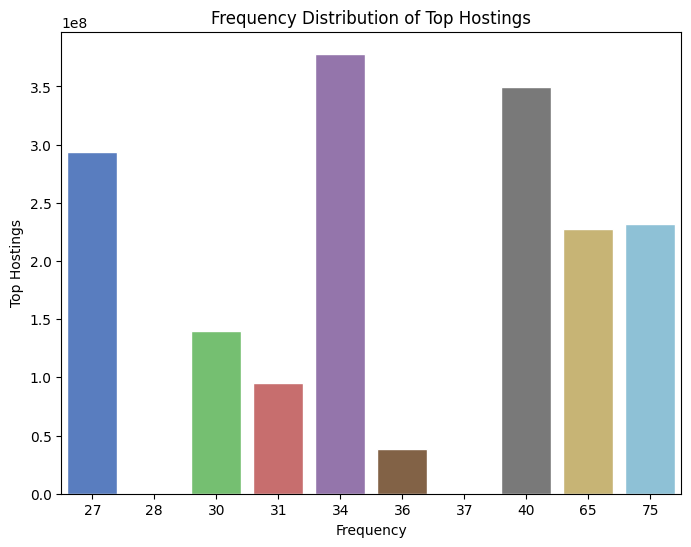

In [ ]:

fig0, ax0 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=top_host.index, data=top_host, palette='muted')

# set the labels and title
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Top Hostings")
ax0.set_title("Frequency Distribution of Top Hostings")

# show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
freq_location = pd.DataFrame({'Frequency': airbnb_df['neighbourhood'].value_counts().sort_values(),
                              'Percent': airbnb_df['neighbourhood'].value_counts(normalize=True).sort_values() * 100})

freq_location.head(10)

,Frequency,Percent
Strathcona,32,0.563777
South Cambie,67,1.180409
Shaughnessy,70,1.233263
Kerrisdale,73,1.286117
Arbutus Ridge,74,1.303735
Oakridge,79,1.391825
Killarney,83,1.462297
West Point Grey,84,1.479915
Victoria-Fraserview,94,1.656096
Sunset,121,2.131783


,Frequency,Percent
Downtown,1579,27.818887
West End,497,8.756166
Kitsilano,429,7.558140
Kensington-Cedar Cottage,353,6.219168
Mount Pleasant,350,6.166314
Downtown Eastside,301,5.303030
Riley Park,273,4.809725
Grandview-Woodland,232,4.087385
Hastings-Sunrise,220,3.875969
Renfrew-Collingwood,220,3.875969


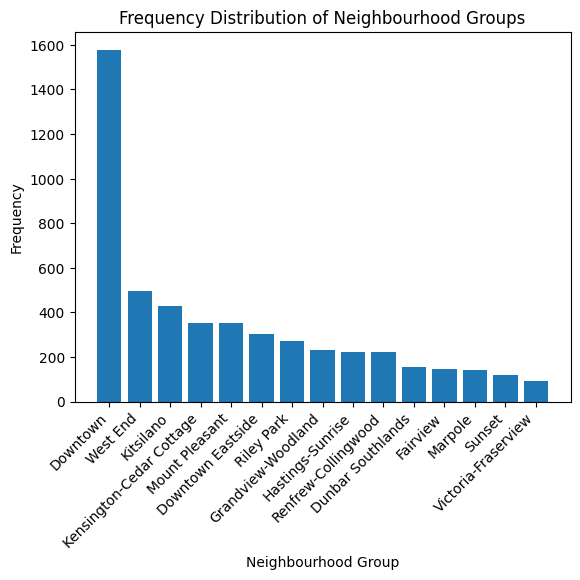

In [ ]:
# sort freq_location in descending order by Frequency and select top 15 values
freq_location_sorted = freq_location.sort_values('Frequency', ascending=False)[:15]
display(freq_location_sorted)
#plot the frequency distribution
fig, ax = plt.subplots()

ax.bar(freq_location_sorted.index, freq_location_sorted['Frequency'], width=0.8, align='center')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Frequency')
# adjust the positions of the x-axis labels
plt.xticks(rotation=45, ha='right')

ax.set_title('Frequency Distribution of Neighbourhood Groups')
plt.show()

What kind of room type is more popular than others?

In [ ]:
freq_type = pd.DataFrame({
    'Frequency': airbnb_df['room_type'].value_counts(),
    'Percent': airbnb_df['room_type'].value_counts(normalize=True) * 100
})

# sort by frequency in ascending order
freq_type = freq_type.sort_values('Frequency')

# display the result
print(freq_type)

                 Frequency    Percent
Hotel room               5   0.088090
Shared room             24   0.422833
Private room           959  16.895701
Entire home/apt       4688  82.593376


,Frequency,Percent
Entire home/apt,4688,82.593376
Private room,959,16.895701
Shared room,24,0.422833
Hotel room,5,0.088090


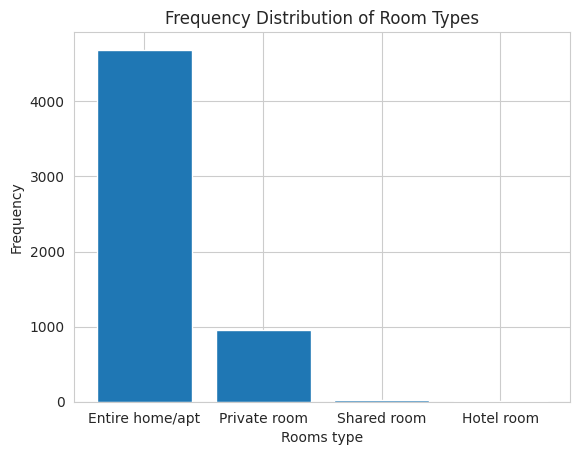

In [ ]:
# sort frequency of room types in descending order by Frequency and select top 3 values
freq_type_sorted = freq_type.sort_values('Frequency', ascending=False)[:5]
display(freq_type_sorted)
#plot the frequency histogram distribution
fig1, ax1 = plt.subplots()

ax1.bar(freq_type_sorted.index, freq_type_sorted['Frequency'], width=0.8, align='center')
ax1.set_xlabel('Rooms type')
ax1.set_ylabel('Frequency')

ax1.set_title('Frequency Distribution of Room Types')
plt.show()

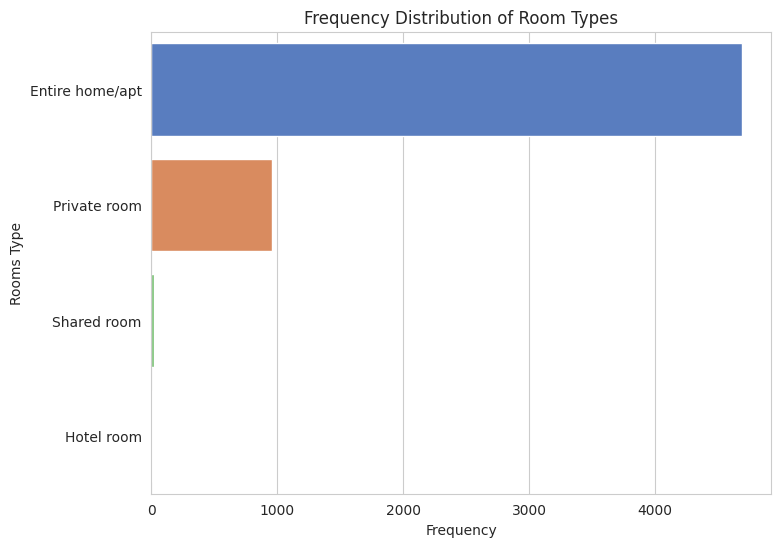

In [ ]:
# create bar plot
fig1_1, ax1_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=freq_type_sorted.index, data=freq_type_sorted, palette='muted')

# set the labels and title
ax1_1.set_xlabel("Frequency")
ax1_1.set_ylabel("Rooms Type")
ax1_1.set_title("Frequency Distribution of Room Types")

# show the plot
plt.show()


We also should know what are the acceptable price for customers.

In [ ]:
#change the type of price
print(airbnb_df['price'].dtype)

airbnb_df['price'] = airbnb_df['price'].astype(str)
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')

airbnb_df['price'] = airbnb_df['price'].astype(float)
print(airbnb_df['price'])

int64
0       150.0
1       150.0
2       150.0
3       108.0
4       350.0
        ...  
5671     83.0
5672    195.0
5673     84.0
5674    120.0
5675    140.0
Name: price, Length: 5676, dtype: float64


<ipython-input-15-ef471ccecb45>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')


In [ ]:
# bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
# bin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

# # Create a new column for price bin
# airbnb_df['price_bin'] = pd.Series(dtype='object')

# # Iterate through each price value and assign the appropriate bin label
# for i, price in enumerate(airbnb_df['price']):
#     for j, bin_edge in enumerate(bin_edges[:-1]):
#         if price >= bin_edge and price < bin_edges[j+1]:
#             airbnb_df.loc[i, 'price_bin'] = bin_labels[j]
#             break

# freq_price = pd.DataFrame({
#     'Frequency': airbnb_df['price_bin'].value_counts(),
#     'Percent': airbnb_df['price_bin'].value_counts(normalize=True) * 100
# })


freq_price = pd.DataFrame({
    'Frequency': airbnb_df['price'].value_counts(),
    'Percent': airbnb_df['price'].value_counts(normalize=True) * 100
})
# sort by frequency in ascending order
freq_type = freq_price.sort_values('Frequency')
# Check the frequency distribution of price bins
display(freq_price)


,Frequency,Percent
150.0,175,3.083157
100.0,126,2.219873
200.0,121,2.131783
120.0,113,1.990839
125.0,101,1.779422
...,...,...
699.0,1,0.017618
11620.0,1,0.017618
443.0,1,0.017618
368.0,1,0.017618


In [ ]:
freq_price = pd.DataFrame({
    'Frequency': airbnb_df['price'].value_counts(),
    'Percent': airbnb_df['price'].value_counts(normalize=True) * 100
})

# Reset the index of the DataFrame
freq_price = freq_price.reset_index().rename(columns={'index': 'Price'})

# Sort by percent in descending order and select the top 4 rows
freq_price_sorted = freq_price.sort_values('Frequency', ascending=False)[:10]

# Check the frequency distribution of price bins
display(freq_price_sorted)


,Price,Frequency,Percent
0,150.0,175,3.083157
1,100.0,126,2.219873
2,200.0,121,2.131783
3,120.0,113,1.990839
4,125.0,101,1.779422
5,110.0,92,1.620860
6,99.0,87,1.532770
7,250.0,84,1.479915
8,90.0,80,1.409443
9,130.0,77,1.356589


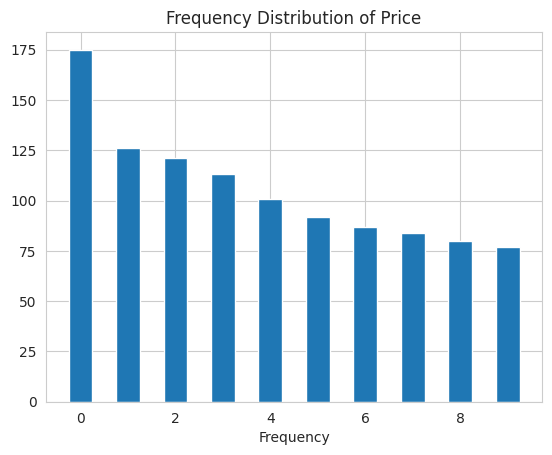

In [ ]:
#plot the frequency histogram distribution
fig2, ax2 = plt.subplots()

ax2.bar(freq_price_sorted.index, freq_price_sorted['Frequency'], width=0.5, align='center')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('')
#plt.xticks(rotation=45, ha='right')
ax2.set_title('Frequency Distribution of Price')
plt.show()

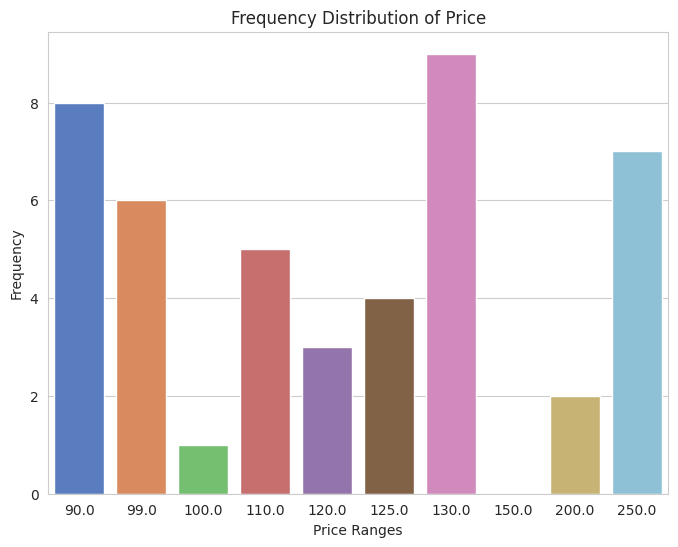

In [ ]:
#create bar plot
fig2_1, ax2_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Price', y=freq_price_sorted.index, data=freq_price_sorted, palette='muted')

# set the labels and title
ax2_1.set_xlabel("Price Ranges")
ax2_1.set_ylabel("Frequency")
ax2_1.set_title("Frequency Distribution of Price")

# show the plot
plt.show()


What is the frequency of prices in different regions?

In [ ]:
#let's find out more about our neibourhoods

#Downtown

sub_1=airbnb_df.loc[airbnb_df['neighbourhood'] == 'Downtown']
price_sub1=sub_1[['price']]

#West End
sub_2=airbnb_df.loc[airbnb_df['neighbourhood'] == 'West End']
price_sub2=sub_2[['price']]

#Kitsilano
sub_3=airbnb_df.loc[airbnb_df['neighbourhood'] == 'Kitsilano']
price_sub3=sub_3[['price']]

#Kensington-Cedar Cottage
sub_4=airbnb_df.loc[airbnb_df['neighbourhood'] == 'Kensington-Cedar Cottage']
price_sub4=sub_4[['price']]

#Mount Pleasant
sub_5=airbnb_df.loc[airbnb_df['neighbourhood'] == 'Mount Pleasant']
price_sub5=sub_5[['price']]

#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

price_list_by_n

[      price
 15    169.0
 16    127.0
 18    140.0
 20    179.0
 25    129.0
 ...     ...
 5656  100.0
 5662  274.0
 5663  109.0
 5671   83.0
 5672  195.0
 
 [1579 rows x 1 columns],
        price
 0      150.0
 10      75.0
 60     150.0
 64     135.0
 67     229.0
 ...      ...
 5646  2000.0
 5655   165.0
 5659   446.0
 5667   139.0
 5674   120.0
 
 [497 rows x 1 columns],
        price
 14     140.0
 22    1950.0
 34     131.0
 35     200.0
 38     170.0
 ...      ...
 5622   634.0
 5623   600.0
 5624   140.0
 5631   250.0
 5661   150.0
 
 [429 rows x 1 columns],
       price
 1     150.0
 2     150.0
 11     99.0
 54    375.0
 55    459.0
 ...     ...
 5580  299.0
 5591  240.0
 5617  156.0
 5636   85.0
 5658  107.0
 
 [353 rows x 1 columns],
       price
 7      94.0
 8      51.0
 30     99.0
 87     86.0
 88     75.0
 ...     ...
 5626  225.0
 5627   69.0
 5639   97.0
 5650   80.0
 5657  130.0
 
 [350 rows x 1 columns]]

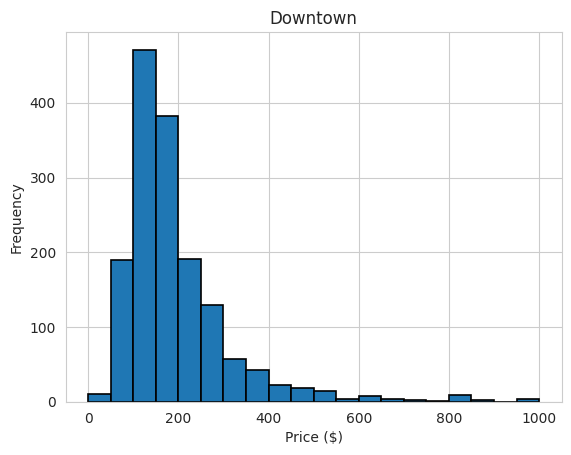

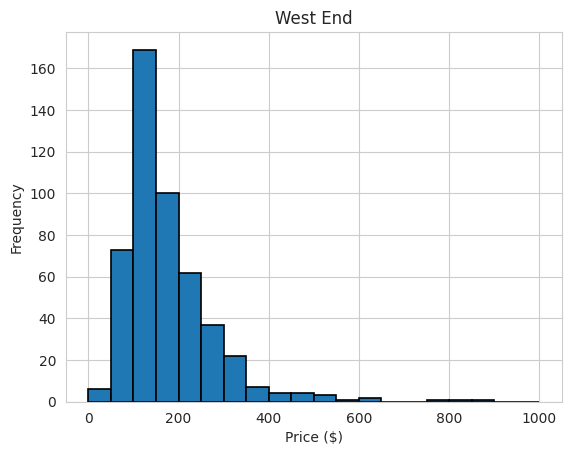

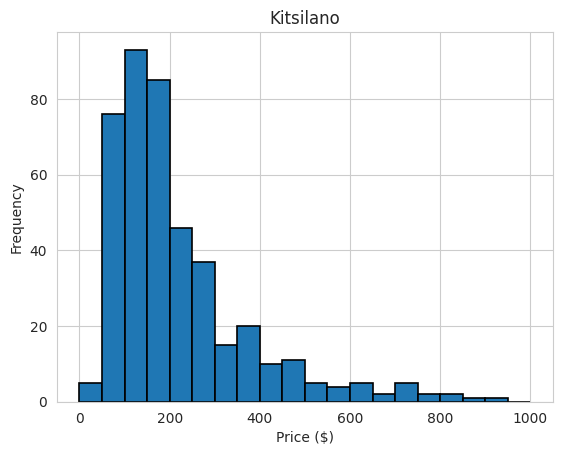

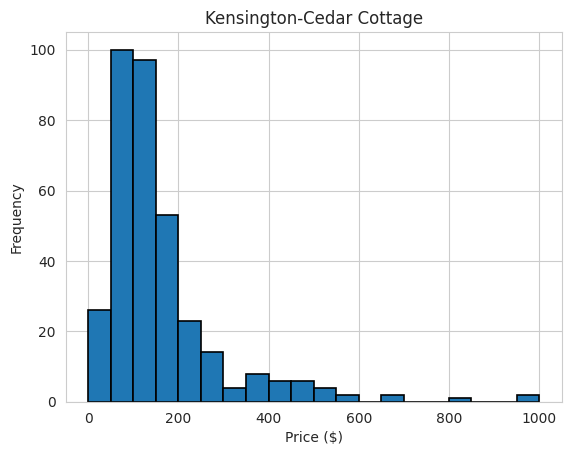

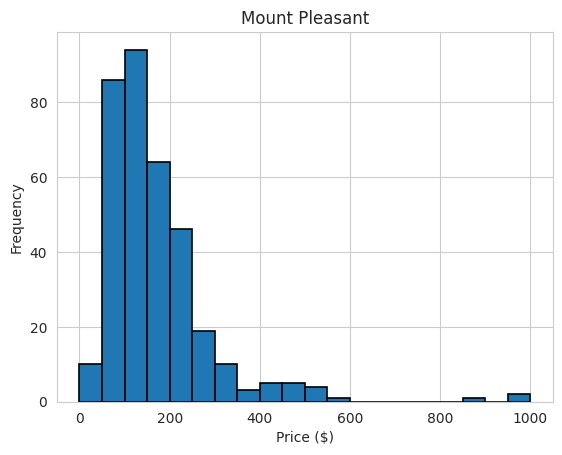

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a list of region names and their corresponding neighbourhoods
regions = {'Downtown': ['Downtown'],
           'West End': ['West End'],
           'Kitsilano': ['Kitsilano'],
           'Kensington-Cedar Cottage': ['Kensington-Cedar Cottage'],
           'Mount Pleasant': ['Mount Pleasant']}

# loop over the regions and calculate price frequencies
for region in regions.keys():
    # filter price data by neighbourhoods
    price_data = airbnb_df.loc[airbnb_df['neighbourhood'] == region, ['price']]
    
    # match the prices with the corresponding region
    region_prices = []
    for price in price_data['price']:
        region_prices.append((region, price))
    sorted_prices = sorted(region_prices, key=lambda x: x[1])
    
    # plot histogram of price frequencies
    fig, ax = plt.subplots()
    ax.hist([p[1] for p in sorted_prices], bins=20, range=(0, 1000), edgecolor='black', linewidth=1.2)
    ax.set_title(region)
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Frequency')
    plt.show()


What is the frequency of prices in different room_types?

In [ ]:
airbnb_df['room_type'].head(20)

0     Entire home/apt
1     Entire home/apt
2     Entire home/apt
3     Entire home/apt
4     Entire home/apt
5     Entire home/apt
6     Entire home/apt
7     Entire home/apt
8        Private room
9        Private room
10       Private room
11    Entire home/apt
12       Private room
13    Entire home/apt
14    Entire home/apt
15    Entire home/apt
16    Entire home/apt
17    Entire home/apt
18    Entire home/apt
19    Entire home/apt
Name: room_type, dtype: object

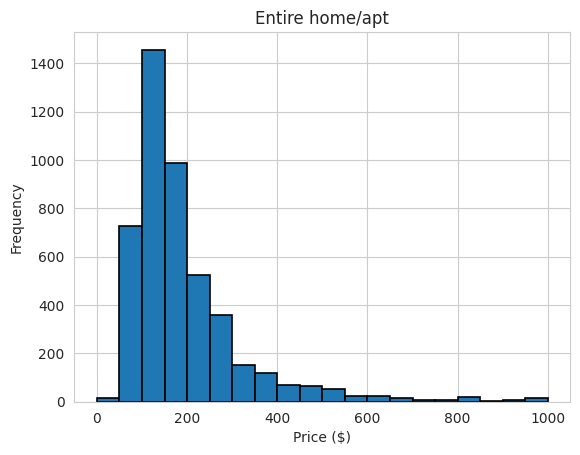

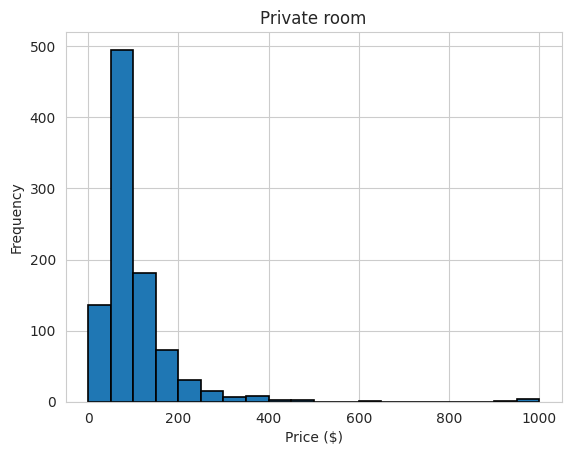

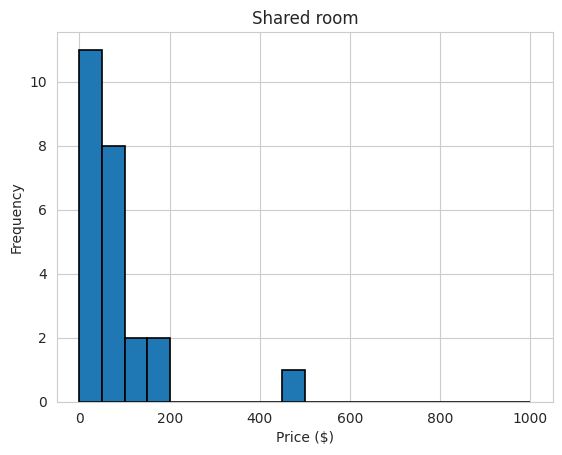

In [ ]:
room_types = {'Entire home/apt': ['Entire home/apt'],
           'Private room': ['Private room'],
           'Shared room': ['Shared room']}

# loop over the regions and calculate price frequencies
for rt in room_types.keys():
    # filter price data by neighbourhoods
    price_data_rt = airbnb_df.loc[airbnb_df['room_type'] == rt, ['price']]
    
    # match the prices with the corresponding region
    rt_prices = []
    for price in price_data_rt['price']:
        rt_prices.append((rt, price))
    rt_sorted_prices = sorted(rt_prices, key=lambda x: x[1])
    
    # plot histogram of price frequencies
    fig, ax = plt.subplots()
    ax.hist([p[1] for p in rt_sorted_prices], bins=20, range=(0, 1000), edgecolor='black', linewidth=1.2)
    ax.set_title(rt)
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Frequency')
    plt.show()

We are also wondering, what reference we can provide with the geographical information in the Airbnb neighbourhood.
<br>
No doubt, in Vancouver area, public transits are a vital part of Airbnb listing for both hosts and vistors, now we want to find the correlation variables between public transits and Airbnb neighbourhood regions.

We can firstly get the frequency for a listing of popular regions.

In [ ]:

freq_location_sorted = freq_location_sorted.reset_index()
freq_location_sorted.rename(columns={'index': 'neighbourhood'}, inplace=True)
freq_location_sorted



,neighbourhood,Frequency,Percent
0,Downtown,1579,27.818887
1,West End,497,8.756166
2,Kitsilano,429,7.558140
3,Kensington-Cedar Cottage,353,6.219168
4,Mount Pleasant,350,6.166314
5,Downtown Eastside,301,5.303030
6,Riley Park,273,4.809725
7,Grandview-Woodland,232,4.087385
8,Hastings-Sunrise,220,3.875969
9,Renfrew-Collingwood,220,3.875969


Group the airbnb location firstly
<br>Calculate the mean latitude and longitude for each area

In [ ]:
airbnb_mean_location = airbnb_df.groupby('neighbourhood')[['latitude', 'longitude']].mean().reset_index()


In [ ]:
freq_location_merged= freq_location_sorted.merge(airbnb_mean_location, on='neighbourhood', how='left')
freq_location_merged

,neighbourhood,Frequency,Percent,latitude,longitude,distance
0,Downtown,1579,27.818887,49.278871,-123.119871,21.187017
1,West End,497,8.756166,49.285064,-123.131588,21.998912
2,Kitsilano,429,7.558140,49.266781,-123.163276,20.557696
3,Kensington-Cedar Cottage,353,6.219168,49.247987,-123.074807,17.555223
4,Mount Pleasant,350,6.166314,49.263923,-123.099066,19.374273
5,Downtown Eastside,301,5.303030,49.280488,-123.098336,21.208347
6,Riley Park,273,4.809725,49.246265,-123.101929,17.434574
7,Grandview-Woodland,232,4.087385,49.273320,-123.065935,20.393211
8,Hastings-Sunrise,220,3.875969,49.276619,-123.042434,20.912049
9,Renfrew-Collingwood,220,3.875969,49.245968,-123.042119,17.541948


We now use two more datasets for getting the information of public transits in Vancouver area.

In [ ]:
# Replace 'file_name.txt' with your text file name
trips_df= 'trips.txt'
stops_df= 'stops.txt'
# Read the tab-separated text file
trips_df = pd.read_csv(trips_df, sep=',')
stops_df = pd.read_csv(stops_df, sep=',')

<ipython-input-8-a74619da2dd8>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_df = pd.read_csv(trips_df, sep=',')


In [ ]:
trips_df.head(10)

,block_id,bikes_allowed,route_id,wheelchair_accessible,direction_id,trip_headsign,shape_id,service_id,trip_id,trip_short_name
0,b_2055230,0,33292,0,0,133 Edmonds Station,281220.0,3_merged_13526206,13421577,NaN
1,a_2052041,0,6738,0,1,502 Surrey Central Station,280557.0,3_merged_13526178,13386080,NaN
2,b_2056387,0,6712,0,0,335 Newton Exchange,281596.0,3_merged_13526206,13439550,NaN
3,a_2052933,0,37810,0,1,R4 To UBC,280821.0,2_merged_13526179,13398847,NaN
4,b_2056205,0,6704,0,0,320 Langley Centre,281546.0,2_merged_13526207,13437166,NaN
5,a_2052702,0,30053,0,1,Expo Line To Waterfront,280770.0,2_merged_13526179,13394835,NaN
6,a_2050137,0,33538,0,0,68 UBC Exchange,279924.0,1_merged_13526174,13353386,NaN
7,a_2052724,0,30053,0,1,Expo Line To Waterfront,280770.0,2_merged_13526179,13394837,NaN
8,a_2052701,0,30053,0,1,Expo Line To Waterfront,280769.0,2_merged_13526179,13394836,NaN
9,a_2052706,0,30053,0,1,Expo Line To Waterfront,280770.0,2_merged_13526179,13394831,NaN


In [ ]:
stops_df.head(10)

,stop_lat,stop_code,stop_lon,stop_id,stop_url,parent_station,stop_desc,stop_name,location_type,zone_id
0,49.277974,61522.0,-123.127034,11542,NaN,NaN,NaN,Southbound Howe St @ Davie St,0,BUS ZN
1,49.248581,53331.0,-122.843968,11543,NaN,NaN,NaN,Northbound Laurentian Cres @ Austin Ave,0,BUS ZN
2,49.170215,61521.0,-123.125653,11540,NaN,NaN,NaN,Westbound Westminster Hwy @ Garden City Rd,0,BUS ZN
3,49.219164,51114.0,-123.150433,11541,NaN,NaN,NaN,Southbound West Blvd @ W 57 Ave,0,BUS ZN
4,49.452388,61528.0,-123.236624,11546,NaN,NaN,NaN,Northbound Hwy 99 Onramp @ Kelvin Grove Way,0,BUS ZN
5,49.386350,61527.0,-123.258380,11547,NaN,NaN,NaN,Northbound Horseshoe Bay Dr @ Pasco Rd,0,BUS ZN
6,49.157771,61526.0,-123.136495,11544,NaN,NaN,NaN,Northbound No. 3 Rd @ Jones Rd,0,BUS ZN
7,49.027511,56113.0,-122.803368,11545,NaN,NaN,NaN,Eastbound Thrift Ave @ Foster St,0,BUS ZN
8,49.458538,61531.0,-123.236819,11548,NaN,NaN,NaN,Southbound Isleview Place @ Lions Bay Ave,0,BUS ZN
9,49.459217,61530.0,-123.235617,11549,NaN,NaN,NaN,Northbound Crosscreek Rd @ Oceanview Rd,0,BUS ZN


Define the haversine function and the function to find the closest Airbnb location for each stop:

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = (math.sin(dlat / 2) ** 2) + math.cos(lat1_rad) * math.cos(lat2_rad) * (math.sin(dlon / 2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

def find_closest_airbnb(lat, lon, airbnb_mean_location):
    airbnb_mean_location['distance'] = airbnb_mean_location.apply(lambda x: haversine(lat, lon, x['latitude'], x['longitude']), axis=1)
    closest_airbnb = airbnb_mean_location.loc[airbnb_mean_location['distance'].idxmin()]
    return closest_airbnb['neighbourhood'], closest_airbnb['distance']


Apply the find_closest_airbnb function to each row in the stops_df dataframe and create new columns with the closest neighbourhood and distance:

In [ ]:
stops_df['closest_neighbourhood'], stops_df['distance_to_neighbourhood'] = zip(*stops_df.apply 
                                                                               (lambda x: find_closest_airbnb(x['stop_lat'], 
                                                                                                              x['stop_lon'], 
                                                                                                              airbnb_mean_location),
                                                                                axis=1))

In [ ]:
#drop the useless column
columns_to_drop = ['stop_url', 'parent_station', 'stop_desc']
stops_df = stops_df.drop(columns=columns_to_drop)


In [ ]:
stops_df.head(10)

,stop_lat,stop_code,stop_lon,stop_id,stop_name,location_type,zone_id,closest_neighbourhood,distance_to_neighbourhood
0,49.277974,61522.0,-123.127034,11542,Southbound Howe St @ Davie St,0,BUS ZN,Downtown,0.529119
1,49.248581,53331.0,-122.843968,11543,Northbound Laurentian Cres @ Austin Ave,0,BUS ZN,Killarney,14.340549
2,49.170215,61521.0,-123.125653,11540,Westbound Westminster Hwy @ Garden City Rd,0,BUS ZN,Marpole,4.690954
3,49.219164,51114.0,-123.150433,11541,Southbound West Blvd @ W 57 Ave,0,BUS ZN,Kerrisdale,0.797730
4,49.452388,61528.0,-123.236624,11546,Northbound Hwy 99 Onramp @ Kelvin Grove Way,0,BUS ZN,West End,20.100025
5,49.386350,61527.0,-123.258380,11547,Northbound Horseshoe Bay Dr @ Pasco Rd,0,BUS ZN,West Point Grey,14.246975
6,49.157771,61526.0,-123.136495,11544,Northbound No. 3 Rd @ Jones Rd,0,BUS ZN,Marpole,6.100866
7,49.027511,56113.0,-122.803368,11545,Eastbound Thrift Ave @ Foster St,0,BUS ZN,Killarney,27.534607
8,49.458538,61531.0,-123.236819,11548,Southbound Isleview Place @ Lions Bay Ave,0,BUS ZN,West End,20.739651
9,49.459217,61530.0,-123.235617,11549,Northbound Crosscreek Rd @ Oceanview Rd,0,BUS ZN,West End,20.778165


We now get the closest neighbourhood and the distance to it for each bus stop.<br>
Users can use this information as reference for their Airbnb listing.

Now for further exploration, we can also determine which group of bus stops are crucial for popular regions. In other words, we can help users to discover those important bus stops for Airbnb hosts based on where they are located.

Merge the freq_location_merged and stops_df dataframes on the closest neighbourhood:

In [ ]:
bus_stops_for_popular_regions = stops_df.merge(freq_location_merged, left_on='closest_neighbourhood', right_on='neighbourhood')


Select the required columns for the final dataframe:

In [ ]:
columns_to_select = ['neighbourhood', 'Frequency', 'Percent', 'stop_name', 'stop_lat', 'stop_lon', 'distance_to_neighbourhood']
bus_stops_for_popular_regions = bus_stops_for_popular_regions[columns_to_select]


In [ ]:
bus_stops_for_popular_regions

,neighbourhood,Frequency,Percent,stop_name,stop_lat,stop_lon,distance_to_neighbourhood
0,Downtown,1579,27.818887,Southbound Howe St @ Davie St,49.277974,-123.127034,0.529119
1,Downtown,1579,27.818887,Westbound W Pender St @ Seymour St,49.283818,-123.113429,0.721723
2,Downtown,1579,27.818887,Westbound W Pender St @ Howe St,49.285523,-123.116055,0.789714
3,Downtown,1579,27.818887,Westbound W Pender St @ Granville St,49.284575,-123.114596,0.740688
4,Downtown,1579,27.818887,Southbound Howe St @ Dunsmuir St,49.284576,-123.117067,0.666125
...,...,...,...,...,...,...,...
4440,Fairview,147,2.589852,Eastbound W 16 Ave @ Burrard St,49.257121,-123.146366,1.289519
4441,Fairview,147,2.589852,Eastbound W 12 Ave @ Oak St,49.260482,-123.126040,0.457084
4442,Fairview,147,2.589852,Eastbound W 6th Ave @ Alder St,49.266010,-123.130869,0.336527
4443,Fairview,147,2.589852,Broadway-City Hall Station @ Bay 3,49.261616,-123.115153,1.162569


We then create a scatter plot of the bus stops in popular Airbnb neighbourhoods, along with the central location of each neighbourhood.

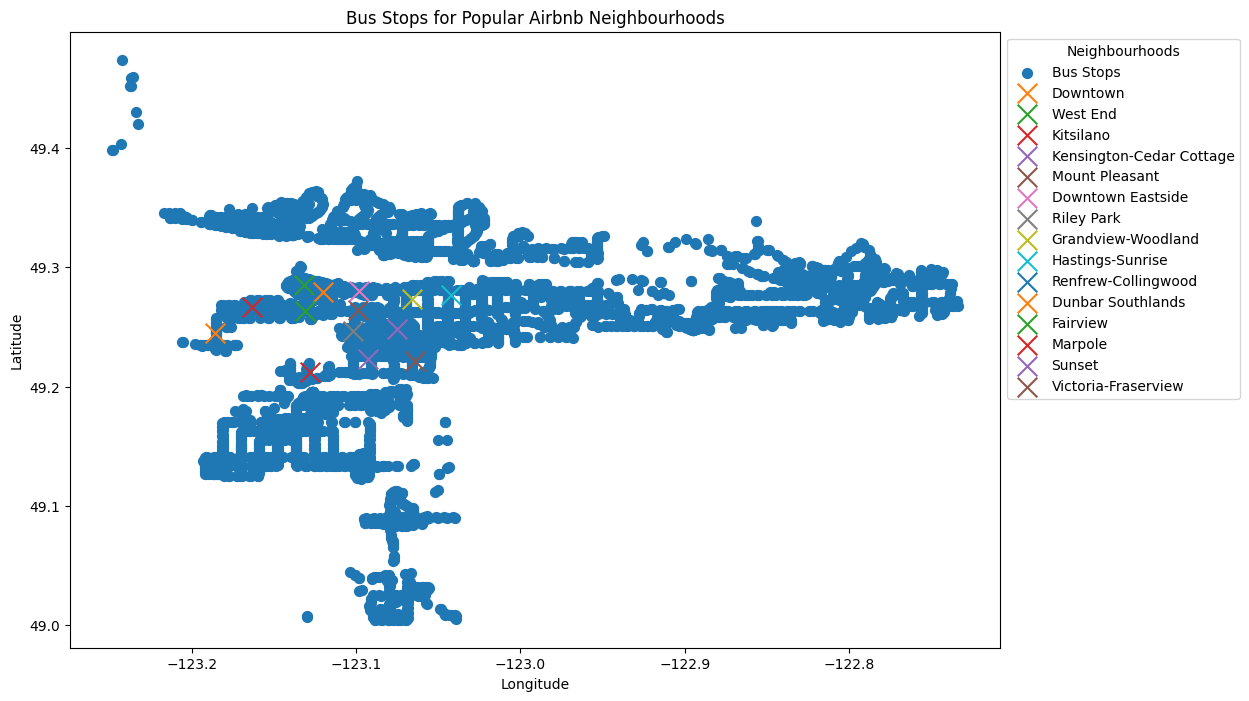

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot using the latitude and longitude of bus stops
plt.scatter(bus_stops_for_popular_regions['stop_lon'], bus_stops_for_popular_regions['stop_lat'], label='Bus Stops', s=50)

# Plot the Airbnb locations for each neighbourhood
for _, row in freq_location_merged.iterrows():
    plt.scatter(row['longitude'], row['latitude'], label=row['neighbourhood'], marker='x', s=200)

# Add labels, legend, and show the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bus Stops for Popular Airbnb Neighbourhoods')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Neighbourhoods')  # Move the legend to the right
plt.show()


We can also get the most favorable trips for Airbnb, based on the most popular transits.<br>
The most popular trips can be obtained through testing the frequency.

In [ ]:
freq_trips = pd.DataFrame({
    'Frequency': trips_df['trip_headsign'].value_counts(),
    'Percent': trips_df['trip_headsign'].value_counts(normalize=True) * 100
})


# Sort by percent in descending order and select the top 4 rows
freq_trips_sorted = freq_trips.sort_values('Frequency', ascending=False)[:20]

freq_trips_sorted.head(20)

,Frequency,Percent
Expo Line To Waterfront,2266,1.897425
Canada Line To Waterfront,1680,1.406741
Millennium Line To Lafarge Lake-Douglas,1304,1.091899
Expo Line To King George,1292,1.081851
Millennium Line To VCC-Clark,1232,1.031610
Expo Line To Production Way-University,1050,0.879213
319 Scott Rd Station,1020,0.854093
99 UBC B-Line,959,0.803014
319 Newton Exchange,877,0.734352
Canada Line To YVR-Airport,874,0.731840


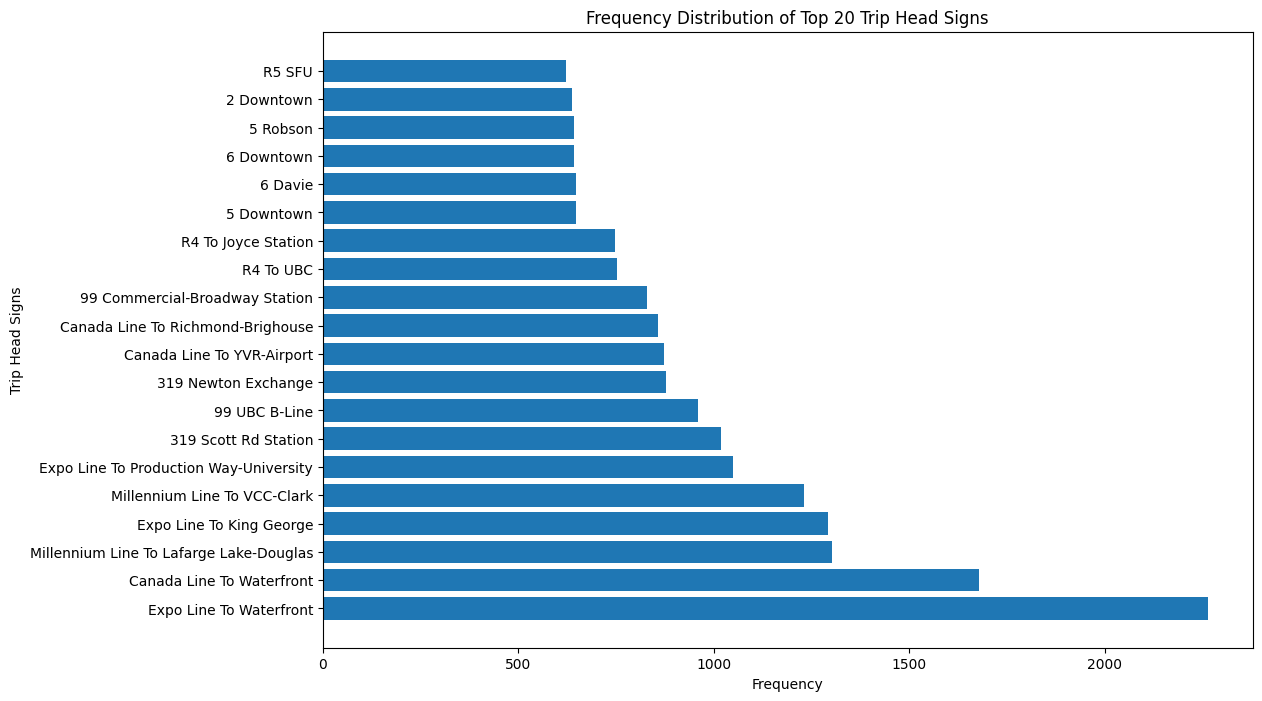

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the horizontal bar plot
plt.barh(freq_trips_sorted.index, freq_trips_sorted['Frequency'])

# Set the y-axis labels to be the trip_headsign values
plt.yticks(freq_trips_sorted.index)

# Set the title and labels for the axes
plt.title('Frequency Distribution of Top 20 Trip Head Signs')
plt.xlabel('Frequency')
plt.ylabel('Trip Head Signs')

# Display the bar plot
plt.show()


According to what we have discovered, we choose the Canada Line and Expo Line as the mostly used transits in Vancouver.

<br>

We then can compare the geographical information of stations in these two lines with the most popular areas in neighborhood analysis.

In [ ]:

stations_df = pd.read_csv("rapid-transit-stations.csv", sep=';')
stations_df.head(10)

,STATION,Geom,Geo Local Area,geo_point_2d
0,Rupert,"{""coordinates"": [-123.03282383181416, 49.26076...",Renfrew-Collingwood,"49.26076477791514, -123.03282383181416"
1,Renfrew,"{""coordinates"": [-123.04530845874768, 49.25889...",Renfrew-Collingwood,"49.25889291082948, -123.04530845874768"
2,Commercial - Broadway,"{""coordinates"": [-123.06845389883729, 49.26293...",Grandview-Woodland,"49.26293626736842, -123.06845389883729"
3,Waterfront,"{""coordinates"": [-123.1133392689008, 49.285665...",Downtown,"49.28566576739238, -123.1133392689008"
4,Vancouver City Center,"{""coordinates"": [-123.11928408921445, 49.28173...",Downtown,"49.28173470745285, -123.11928408921445"
5,Commercial - Broadway,"{""coordinates"": [-123.0690994031622, 49.261817...",Kensington-Cedar Cottage,"49.26181784640944, -123.0690994031622"
6,Waterfront,"{""coordinates"": [-123.11173815504947, 49.28607...",Downtown,"49.286075484422376, -123.11173815504947"
7,VCC - Clark,"{""coordinates"": [-123.07896225243121, 49.26578...",Strathcona,"49.2657831984991, -123.07896225243121"
8,Olympic Village,"{""coordinates"": [-123.11519667899394, 49.26634...",Fairview,"49.26634023249435, -123.11519667899394"
9,Broadway - City Hall,"{""coordinates"": [-123.11478218139136, 49.26277...",Mount Pleasant,"49.262773467883484, -123.11478218139136"


Extract the longitude and latitude from the 'coordinates' column and create two new columns:


In [ ]:
import pandas as pd
import json
stations_df[['latitude', 'longitude']] = stations_df['geo_point_2d'].str.split(', ', expand=True).astype(float)

stations_df.head(10)

,STATION,Geom,Geo Local Area,geo_point_2d,latitude,longitude
0,Rupert,"{""coordinates"": [-123.03282383181416, 49.26076...",Renfrew-Collingwood,"49.26076477791514, -123.03282383181416",49.260765,-123.032824
1,Renfrew,"{""coordinates"": [-123.04530845874768, 49.25889...",Renfrew-Collingwood,"49.25889291082948, -123.04530845874768",49.258893,-123.045308
2,Commercial - Broadway,"{""coordinates"": [-123.06845389883729, 49.26293...",Grandview-Woodland,"49.26293626736842, -123.06845389883729",49.262936,-123.068454
3,Waterfront,"{""coordinates"": [-123.1133392689008, 49.285665...",Downtown,"49.28566576739238, -123.1133392689008",49.285666,-123.113339
4,Vancouver City Center,"{""coordinates"": [-123.11928408921445, 49.28173...",Downtown,"49.28173470745285, -123.11928408921445",49.281735,-123.119284
5,Commercial - Broadway,"{""coordinates"": [-123.0690994031622, 49.261817...",Kensington-Cedar Cottage,"49.26181784640944, -123.0690994031622",49.261818,-123.069099
6,Waterfront,"{""coordinates"": [-123.11173815504947, 49.28607...",Downtown,"49.286075484422376, -123.11173815504947",49.286075,-123.111738
7,VCC - Clark,"{""coordinates"": [-123.07896225243121, 49.26578...",Strathcona,"49.2657831984991, -123.07896225243121",49.265783,-123.078962
8,Olympic Village,"{""coordinates"": [-123.11519667899394, 49.26634...",Fairview,"49.26634023249435, -123.11519667899394",49.266340,-123.115197
9,Broadway - City Hall,"{""coordinates"": [-123.11478218139136, 49.26277...",Mount Pleasant,"49.262773467883484, -123.11478218139136",49.262773,-123.114782


In [ ]:
#Define a function to calculate the distance between two geographical points using the Haversine formula

import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = (math.sin(dlat / 2) ** 2) + math.cos(lat1_rad) * math.cos(lat2_rad) * (math.sin(dlon / 2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c


In [ ]:
#Define a function to find the closest station for each neighbourhood

def find_closest_station(lat, lon, stations_df):
    stations_df['distance'] = stations_df.apply(lambda x: haversine(lat, lon, x['latitude'], x['longitude']), axis=1)
    closest_station = stations_df.loc[stations_df['distance'].idxmin()]
    return closest_station['Geo Local Area'], closest_station['STATION']


In [ ]:
freq_location_merged['Geo Local Area'], freq_location_merged['closest_station'] = zip(*freq_location_merged.apply(lambda x: find_closest_station(x['latitude'], x['longitude'], stations_df), axis=1))


In [ ]:
freq_location_merged

,neighbourhood,Frequency,Percent,latitude,longitude,distance,Geo Local Area,closest_station
0,Downtown,1579,27.818887,49.278871,-123.119871,21.187017,Downtown,Vancouver City Center
1,West End,497,8.756166,49.285064,-123.131588,21.998912,Downtown,Burrard
2,Kitsilano,429,7.558140,49.266781,-123.163276,20.557696,Downtown,Yaletown - Roundhouse
3,Kensington-Cedar Cottage,353,6.219168,49.247987,-123.074807,17.555223,Renfrew-Collingwood,Nanaimo
4,Mount Pleasant,350,6.166314,49.263923,-123.099066,19.374273,Downtown,Main Street - Science World
5,Downtown Eastside,301,5.303030,49.280488,-123.098336,21.208347,Downtown,Stadium - Chinatown
6,Riley Park,273,4.809725,49.246265,-123.101929,17.434574,Riley Park,King Edward
7,Grandview-Woodland,232,4.087385,49.273320,-123.065935,20.393211,Grandview-Woodland,Commercial - Broadway
8,Hastings-Sunrise,220,3.875969,49.276619,-123.042434,20.912049,Renfrew-Collingwood,Rupert
9,Renfrew-Collingwood,220,3.875969,49.245968,-123.042119,17.541948,Renfrew-Collingwood,29th Avenue


After data transformation with three different dataframes, we can provide users with geographical choice about public transits.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

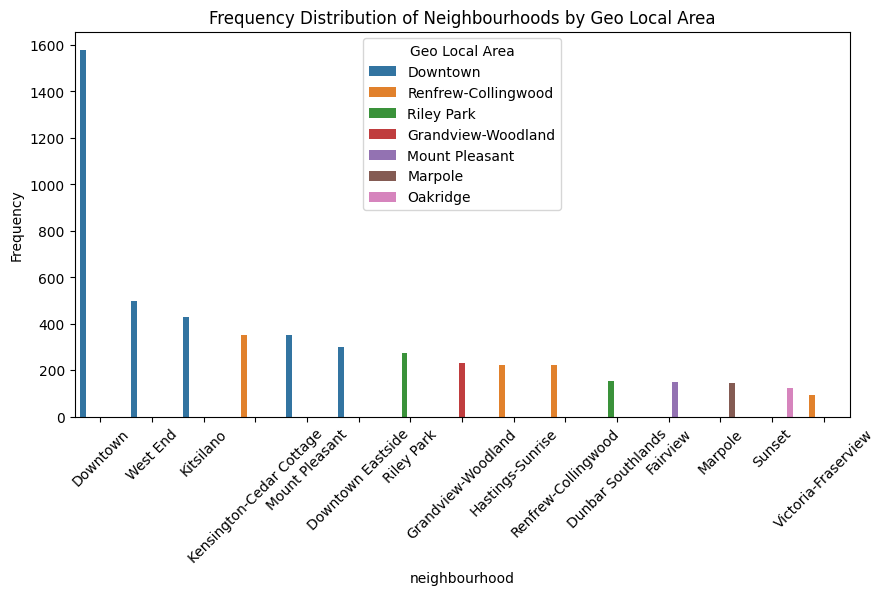

In [ ]:
#Create a bar plot for the 'Geo Local Area' column
plt.figure(figsize=(10, 5))
sns.barplot(data=freq_location_merged, x='neighbourhood', y='Frequency', hue='Geo Local Area')
plt.xticks(rotation=45)
plt.title("Frequency Distribution of Neighbourhoods by Geo Local Area")
plt.show()


Taking into account most popular areas in advance, users can decide their Airbnb strategy with what geographical areas they are within for public transits.

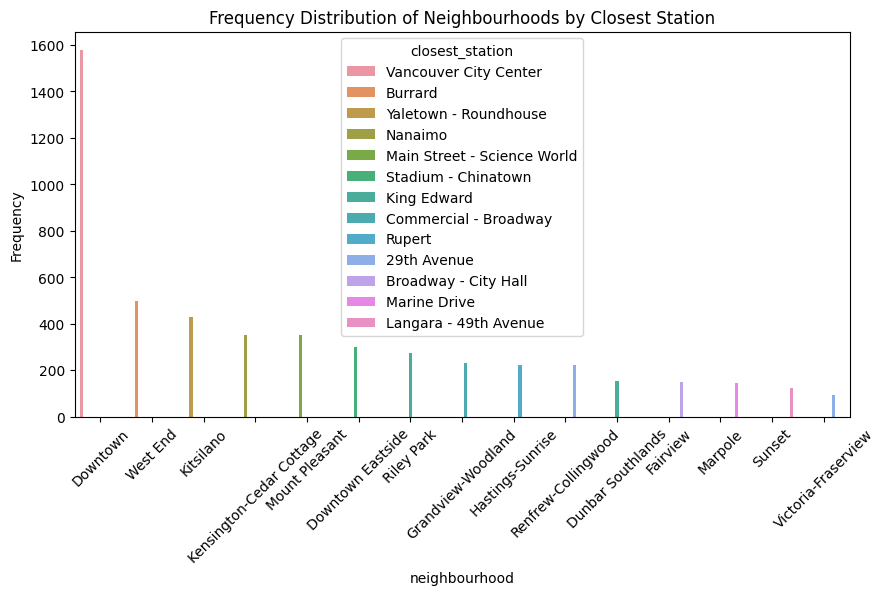

In [ ]:
#Create a bar plot for the 'closest_station' column

plt.figure(figsize=(10, 5))
sns.barplot(data=freq_location_merged, x='neighbourhood', y='Frequency', hue='closest_station')
plt.xticks(rotation=45)
plt.title("Frequency Distribution of Neighbourhoods by Closest Station")
plt.show()


Users can also determine the strategy more specific based on station distributions.